I will build a handwritted digits calcultor using a convolutional neural network with the Keras library. I will use the Keras built-in MNIST dataset.

This project is for my learning purposes, as I am fairly new to working with Keras and CNN's, and I am following the code from [StudyMachineLearning.com](https://studymachinelearning.com/convolutional-neural-networks-with-keras-in-python/)

In [1]:
from keras.datasets import mnist
(trainX, trainy), (testX, testy) = mnist.load_data()
print('Train data: X = {} Y = {}'.format(trainX.shape, trainy.shape))
print('Test data: X = {} Y = {}'.format(testX.shape, testy.shape))

Train data: X = (60000, 28, 28) Y = (60000,)
Test data: X = (10000, 28, 28) Y = (10000,)


Let's plot some samples from the dataset

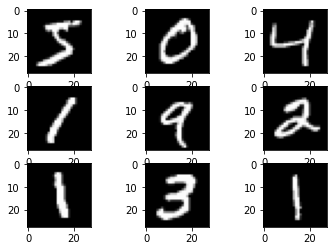

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

for i in range(9):
    plt.subplot(330 + 1 + i)
    plt.imshow(trainX[i], cmap=plt.get_cmap('gray'))
plt.show()

I will need to reshape the data arrays to have a single color channel

In [3]:
trainX = trainX.reshape((trainX.shape[0], 28, 28, 1))
testX = testX.reshape((testX.shape[0], 28, 28, 1))
print('trainX : {} '.format(trainX.shape))
print('testX  : {} '.format(testX.shape))

trainX : (60000, 28, 28, 1) 
testX  : (10000, 28, 28, 1) 


There are a total of 10 classes for digit between 0 and 1. I will use one-hot encoding for class labels via the Keras to_categorical() method

In [4]:
from keras.utils import to_categorical
trainY = to_categorical(trainy)
testY = to_categorical(testy)
print('trainY shape : {} '.format(trainY.shape))
print('testY  shape : {} '.format(testY.shape))

trainY shape : (60000, 10) 
testY  shape : (10000, 10) 


I will now normalize the pixel values to the range of [0,1]

In [5]:
train_norm = trainX.astype('float32')
test_norm = testX.astype('float32')
train_norm = train_norm / 255.0
test_norm = test_norm / 255.0

Now I will define a baseline Convolutional neural network model and train it

In [6]:
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Dense, Dropout, Flatten
from keras.optimizers import SGD
num_classes = 10

def prepare_model():
    model = Sequential()
    model.add(Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(28,28,1)))
    model.add(Conv2D(64, (3,3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.25))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(num_classes, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [7]:
model = prepare_model()
model.fit(train_norm, trainY, batch_size=128, validation_split=0.2, epochs=3, verbose=1)

Epoch 1/3
375/375 [==============================] - 54s 143ms/step - loss: 0.2799 - accuracy: 0.9139 - val_loss: 0.0691 - val_accuracy: 0.9795
Epoch 2/3
375/375 [==============================] - 55s 146ms/step - loss: 0.0954 - accuracy: 0.9712 - val_loss: 0.0486 - val_accuracy: 0.9853
Epoch 3/3
375/375 [==============================] - 60s 161ms/step - loss: 0.0714 - accuracy: 0.9779 - val_loss: 0.0455 - val_accuracy: 0.9870


Let's take a look at the learning curves of the trainig and validation accuracy and loss

In [12]:
print(model.history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


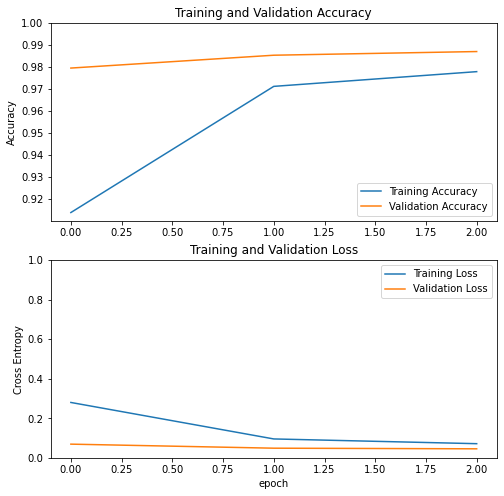

In [14]:
acc = model.history.history['accuracy']
val_acc = model.history.history['val_accuracy']
loss = model.history.history['loss']
val_loss = model.history.history['val_loss']

plt.figure(figsize=(8,8))
plt.subplot(2,1,1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()), 1])
plt.title('Training and Validation Accuracy')

plt.subplot(2,1,2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,1.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')

plt.show()

Now let's evaluate the trained model on the test data and observe the accuracy

In [15]:
score = model.evaluate(test_norm, testY, verbose=0)
print('Test loss: ', score[0])
print('Test accuracy:', score[1])

Test loss:  0.03663554787635803
Test accuracy: 0.9879999756813049


We were correctly able to predict the test data approx. 98.8% of the time. Great Success! All that is left is to save the model to be able to use it again.

In [16]:
model.save('trained_model.h5')